Importing Libraries

In [1]:
import os
from random import randint
from random import seed
import numpy as np
import cv2
from skimage.transform import resize
import tensorflow as tf


Loading vessel images

In [2]:
training_vessels=os.listdir(r'C:\Users\Deepak Sethupathy\Documents\College\Summer_internship\vessel_segmentation\train\1st_manual')
path=r'C:\Users\Deepak Sethupathy\Documents\College\Summer_internship\vessel_segmentation\train\1st_manual\\'
print(training_vessels)

list_path=[]
for i in training_vessels:
    list_path.append(str(path+str(i)))
print(list_path)
images=np.zeros((len(list_path),584,565,1),dtype=np.uint8)

#reading images, convert to binary and add to array images.
for i in range(len(list_path)):
    temp=cv2.imread(list_path[i],0)
    (thresh, blackAndWhiteImage) = cv2.threshold(temp, 127, 255, cv2.THRESH_BINARY) 
    temp = resize(blackAndWhiteImage, (584, 565,1), mode='constant', preserve_range=True)
    images[i]=temp
    
#images[i]=cv2.imread(list_path[i],0)
#one_image=cv2.imread(r'C:\Users\Deepak Sethupathy\Documents\College\Summer_internship\vessel_segmentation\train\1st_manual\21_manual1.jpg',0)

['21_manual1.jpg', '22_manual1.jpg', '23_manual1.jpg', '24_manual1.jpg', '25_manual1.jpg', '26_manual1.jpg', '27_manual1.jpg', '28_manual1.jpg', '29_manual1.jpg', '30_manual1.jpg', '31_manual1.jpg', '32_manual1.jpg', '33_manual1.jpg', '34_manual1.jpg', '35_manual1.jpg', '36_manual1.jpg', '37_manual1.jpg', '38_manual1.jpg', '39_manual1.jpg', '40_manual1.jpg']
['C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\1st_manual\\\\21_manual1.jpg', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\1st_manual\\\\22_manual1.jpg', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\1st_manual\\\\23_manual1.jpg', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\1st_manual\\\\24_manual1.jpg', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\1st_manual\\\\25_manual1

In [35]:
print('Number of vessels images found ='+str(len(images)))

for i in range(len(images)):
    cv2.imshow('image'+str(i),images[i])
    cv2.waitKey(0)
    

Number of vessels images found =20


Loading Fundus images

In [4]:
fundus=os.listdir(r'C:\Users\Deepak Sethupathy\Documents\College\Summer_internship\vessel_segmentation\train\images')
path2=r'C:\Users\Deepak Sethupathy\Documents\College\Summer_internship\vessel_segmentation\train\images\\'
print(fundus)
list_path2=[]

for i in fundus:
    list_path2.append(str(path2+str(i)))
print(list_path2)
fundus_images=np.zeros((len(list_path2),584,565,1),dtype=np.uint8)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

#reading images, convert to gray scale, apply CLAHE add to array fundus_images images.
for i in range(len(list_path2)):
    t=cv2.imread(list_path2[i],0)
    t1=clahe.apply(t)
    t2=resize(t1, (584, 565,1), mode='constant', preserve_range=True)
    fundus_images[i]=t2
    #fundus_images[i]=cv2.imread(list_path2[i],0)

['21_training.tif', '22_training.tif', '23_training.tif', '24_training.tif', '25_training.tif', '26_training.tif', '27_training.tif', '28_training.tif', '29_training.tif', '30_training.tif', '31_training.tif', '32_training.tif', '33_training.tif', '34_training.tif', '35_training.tif', '36_training.tif', '37_training.tif', '38_training.tif', '39_training.tif', '40_training.tif']
['C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\images\\\\21_training.tif', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\images\\\\22_training.tif', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\images\\\\23_training.tif', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\images\\\\24_training.tif', 'C:\\Users\\Deepak Sethupathy\\Documents\\College\\Summer_internship\\vessel_segmentation\\train\\images\\\\25_tra

In [37]:
print('Number of fundus images found ='+str(len(fundus_images)))
for i in range(len(fundus_images)):
    cv2.imshow('image'+str(i),fundus_images[i])
    cv2.waitKey(0)

Number of fundus images found =20


Extracting Patches.


Total 2000 patches of size 48x48. 100 patches from each image.

In [6]:
real=np.zeros((2000,48,48,1),dtype=np.uint8)
ves=np.zeros((2000,48,48,1))
seed(0)
itr=0

for j in range(20):
    one_image=images[j]
    two_image=fundus_images[j]
    for i in range(100):
        x=randint(0,536)
        y=randint(0,516)
        real[itr]=np.copy(two_image[x:x+48,y:y+48,:])
        ves[itr]=np.copy(one_image[x:x+48,y:y+48,:])
        itr=itr+1
ves=ves/255      
    

In [7]:
print(np.max(ves)) 
print(np.min(ves))

1.0
0.0


In [8]:
#printing few images for test
for i in range (200,205):
    cv2.imshow('image',real[i])
    cv2.waitKey(0)
    cv2.imshow('image2',ves[i])
    cv2.waitKey(0)


In [9]:
#verifying shape
print(real.shape)
print(ves.shape)

(2000, 48, 48, 1)
(2000, 48, 48, 1)


Defining and training the UNET model

In [10]:
#Build the model
inputs = tf.keras.layers.Input((48, 48, 1))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

callbacks = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=2, save_best_only=True)
#callbacks = myCallback()
results = model.fit(real, ves, validation_split=0.2, batch_size=60, epochs=100,verbose=2, callbacks=[callbacks])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 48, 48, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   320         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________________


Epoch 00001: val_loss improved from inf to 0.39302, saving model to model_for_nuclei.h5
1600/1600 - 19s - loss: 0.4839 - accuracy: 0.8605 - val_loss: 0.3930 - val_accuracy: 0.8944
Epoch 2/100

Epoch 00002: val_loss improved from 0.39302 to 0.32556, saving model to model_for_nuclei.h5
1600/1600 - 9s - loss: 0.3631 - accuracy: 0.9019 - val_loss: 0.3256 - val_accuracy: 0.8944
Epoch 3/100

Epoch 00003: val_loss improved from 0.32556 to 0.28306, saving model to model_for_nuclei.h5
1600/1600 - 9s - loss: 0.2903 - accuracy: 0.9019 - val_loss: 0.2831 - val_accuracy: 0.8944
Epoch 4/100

Epoch 00004: val_loss improved from 0.28306 to 0.27303, saving model to model_for_nuclei.h5
1600/1600 - 9s - loss: 0.2630 - accuracy: 0.9028 - val_loss: 0.2730 - val_accuracy: 0.8966
Epoch 5/100

Epoch 00005: val_loss improved from 0.27303 to 0.27084, saving model to model_for_nuclei.h5
1600/1600 - 9s - loss: 0.2836 - accuracy: 0.9013 - val_loss: 0.2708 - val_accuracy: 0.8944
Epoch 6/100

Epoch 00006: val_loss 

Epoch 48/100

Epoch 00048: val_loss did not improve from 0.10749
1600/1600 - 8s - loss: 0.1013 - accuracy: 0.9496 - val_loss: 0.1083 - val_accuracy: 0.9403
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.10749
1600/1600 - 8s - loss: 0.0986 - accuracy: 0.9504 - val_loss: 0.1076 - val_accuracy: 0.9413
Epoch 50/100

Epoch 00050: val_loss did not improve from 0.10749
1600/1600 - 8s - loss: 0.0967 - accuracy: 0.9508 - val_loss: 0.1095 - val_accuracy: 0.9375
Epoch 51/100

Epoch 00051: val_loss improved from 0.10749 to 0.10642, saving model to model_for_nuclei.h5
1600/1600 - 9s - loss: 0.0961 - accuracy: 0.9510 - val_loss: 0.1064 - val_accuracy: 0.9422
Epoch 52/100

Epoch 00052: val_loss improved from 0.10642 to 0.10522, saving model to model_for_nuclei.h5
1600/1600 - 9s - loss: 0.0949 - accuracy: 0.9512 - val_loss: 0.1052 - val_accuracy: 0.9403
Epoch 53/100

Epoch 00053: val_loss did not improve from 0.10522
1600/1600 - 8s - loss: 0.0941 - accuracy: 0.9512 - val_loss: 0.1074 - val

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.10515
1600/1600 - 8s - loss: 0.0509 - accuracy: 0.9596 - val_loss: 0.1401 - val_accuracy: 0.9382


In [33]:
model.save(r"C:\Users\Deepak Sethupathy\Documents\College\Summer_internship\vessel_segmentation\best_model2.h5")

In [21]:
#Prediction
pred=model.predict(real,verbose=1)
print(pred.shape)
thresh= (pred > 0.5).astype(np.uint8)
print(thresh.shape)
teo=thresh[55]
(thresh, two) = cv2.threshold(teo, 0, 255, cv2.THRESH_BINARY)
print(two)


2000/2000 [==============================] - 3s 2ms/sample
(2000, 48, 48, 1)
(2000, 48, 48, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
#Comparing Predcition and ground truth
cv2.imshow('predicted',two)
cv2.waitKey(0)
cv2.imshow('real',ves[55])
cv2.waitKey(0)



-1

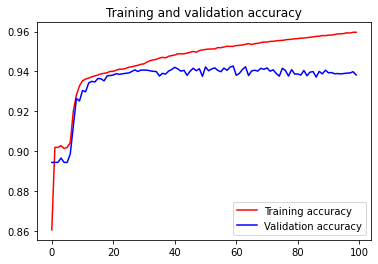

In [32]:
import matplotlib.pyplot as plt
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
#plt.figure()
plt.savefig('foo.png', bbox_inches='tight')
#plt.show()
